# Programming-Assignment-4 (Pavan Kumar Mistry)

### 1. (Feature Extraction)
#### • Convert the images from the 4-class dog dataset to edge histograms. (You should have done this in Assignment 2) and normalize the histogram dataset. (2 points)

In [2]:
import pandas as pd
import numpy as np
import os
import cv2
import glob
from skimage import io, color, filters, exposure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


interested_classes = [
    'n02099712-Labrador_retriever',
    'n02100735-English_setter',
    'n02113799-standard_poodle',
    'n02107312-miniature_pinscher'
]

base_path = os.getcwd()
image_path = os.path.join(base_path, 'images')

In [3]:
allImages = []
allLabels = []

for index, className in enumerate(interested_classes):
    dir = os.path.join(image_path, className)
    img = glob.glob(os.path.join(dir, "*.jpg"))
    allImages.extend(img)
    allLabels.extend([index] * len(img))

print(allImages[:10])
print(allLabels[:500])

['M:\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1150.jpg', 'M:\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1200.jpg', 'M:\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1229.jpg', 'M:\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1254.jpg', 'M:\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_129.jpg', 'M:\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1383.jpg', 'M:\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1414.jpg', 'M:\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1436.jpg', 'M:\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1660.jpg', 'M:\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1828.jpg']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [4]:
def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

def image_to_edge_histogram(image_path):
    img = io.imread(image_path)
    grayscale_img = color.rgb2gray(img)
    dx = filters.sobel_h(grayscale_img)
    dy = filters.sobel_v(grayscale_img)

    angle_img = angle(dx, dy)
    hist, _ = exposure.histogram(angle_img, nbins=36, source_range='dtype')
    return hist

edge_histogram = np.array([image_to_edge_histogram(img_path) for img_path in allImages])
print(edge_histogram[:500])

[[   0    0    0 ... 3111 3253 3169]
 [   0    0    0 ... 3791 3902 3861]
 [   0    0    0 ... 3009 3106 3246]
 ...
 [   0    0    0 ... 1933 2042 2319]
 [   0    0    0 ... 2826 2873 3063]
 [   0    0    0 ... 2468 2514 2583]]


### Normalize Histograms

In [5]:
scaler = StandardScaler()
histograms_normalized = scaler.fit_transform(edge_histogram)
histograms_normalized

array([[ 0.        ,  0.        ,  0.        , ...,  0.26288909,
         0.28852561,  0.1770228 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.60599558,
         0.61162587,  0.51444506],
       [ 0.        ,  0.        ,  0.        , ...,  0.21142312,
         0.21534265,  0.21456834],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.61457324,
         0.43588721,  0.25211388],
       [ 0.        ,  0.        ,  0.        , ...,  0.39004032,
         0.33034444,  0.19262614],
       [ 0.        ,  0.        ,  0.        , ..., -0.08778593,
        -0.09879644, -0.04581242]])

### 2.(Dimension Reduction) Perform dimension reduction on your new dog image representation dataset to reduce the dimension to 2 (similar to Assignment 1 Question 2(f)). (1 point)

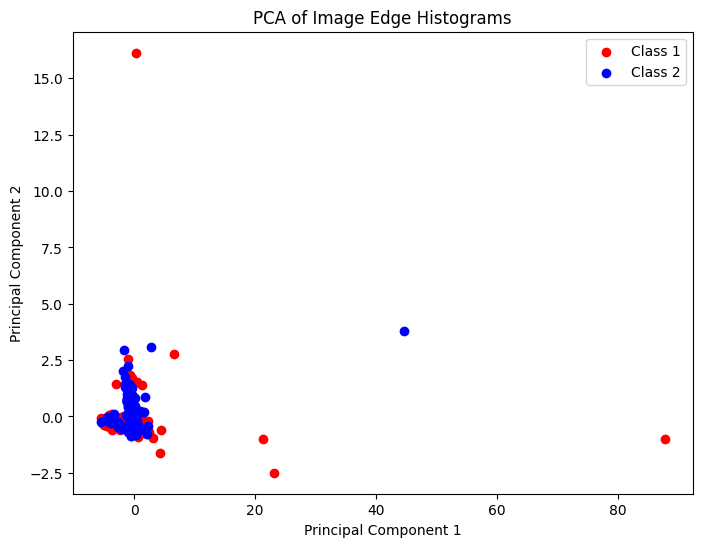

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import glob

def generate_edge_hist(img):
    grayscale_img = color.rgb2gray(img)
    dx = filters.sobel_h(grayscale_img)
    dy = filters.sobel_v(grayscale_img)
    angles = np.arctan2(dy, dx)
    hist, _ = np.histogram(angles, bins=36, range=(-np.pi, np.pi))
    return hist

def perform_pca_and_plot(class1_paths, class2_paths):
    histograms = []
    class_labels = []
    for img_path in class1_paths + class2_paths:
        img = io.imread(img_path)
        hist = generate_edge_hist(img)
        histograms.append(hist)
        class_labels.append("Class 1" if img_path in class1_paths else "Class 2")
    
    scaler = StandardScaler()
    histograms_std = scaler.fit_transform(histograms)
    
    pca = PCA(n_components=2)
    histograms_pca = pca.fit_transform(histograms_std)
    
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(class_labels):
        color = 'red' if label == "Class 1" else 'blue'
        plt.scatter(histograms_pca[i, 0], histograms_pca[i, 1], color=color, label=label if i == 0 or i == len(class1_paths) else "")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Image Edge Histograms')
    plt.legend()
    plt.show()

    return histograms_pca, class_labels

def fetch_all_images_from_folder(class_folder_path):
    return [os.path.join(class_folder_path, img_name) for img_name in os.listdir(class_folder_path) if img_name.lower().endswith((".jpg", ".png", ".jpeg"))]

class1_folder_path = "images/n02100735-English_setter"
class2_folder_path = "images/n02107312-miniature_pinscher"

list_of_class1_img_path = fetch_all_images_from_folder(class1_folder_path)
list_of_class2_img_path = fetch_all_images_from_folder(class2_folder_path)

principal_components, labels = perform_pca_and_plot(list_of_class1_img_path, list_of_class2_img_path)


3. (Clustering Algorithm) Perform clustering using the following approaches on the 2D dataset you
preprocessed in Item 2:

+ K-mean clustering and its variants for 𝐾 = 4:
    - (a) K-means clustering: (Use KMeans with init = ‘Random’) (0.5 point)
    - (b) KMeans with init=‘k-means++’ (0.5 point)
    - (c) Bisecting K-means (sklearn.cluster.BisectingKMeans with init = ‘Random’) (0.5 point)
    - (d) spectral clustering (sklearn.cluster.SpectralClustering with default parameters) (0.5 point)
+ DBSCAN (0.5 point)
– What are the eps and min samples parameter values you used to get 4 clusters? (0.5
point)
+ Agglomerative clustering (i.e., hierarchical clustering) - use sklearn.cluster.AgglomerativeClustering
with number of clusters set to 4

+ (a) Single link (MIN), (0.5 point)
+ (b) Complete link (MAX), (0.5 point)
+ (c) Group Average, and (0.5 point)
+ (d) Ward’s method (0.5 point)
Use the four linkage values ‘ward’, ‘complete’, ‘average’, ‘single’ for sklearn.cluster.
AgglomerativeClustering

In [110]:
from sklearn.cluster import KMeans, BisectingKMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
import matplotlib.pyplot as plt
import numpy as np

data = principal_components

def show_cluster(data, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.8)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter)
    plt.show()

### K-Means Clustering

In [111]:
# a. K-mean with random inititalization
randomKMean = KMeans(n_clusters=4, init='random', n_init=10, random_state=42)
randomKMean.fit(data)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

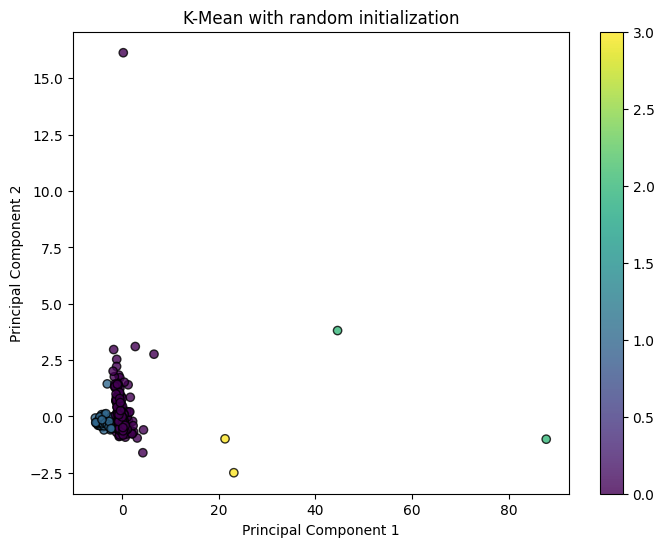

In [112]:
show_cluster(data, randomKMean.labels_, "K-Mean with random initialization")

In [113]:
# b. K-means with k-means++ initialization
kMeanWithPlusPlus = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kMeanWithPlusPlus.fit(data)

KMeans(n_clusters=4, n_init=10, random_state=42)

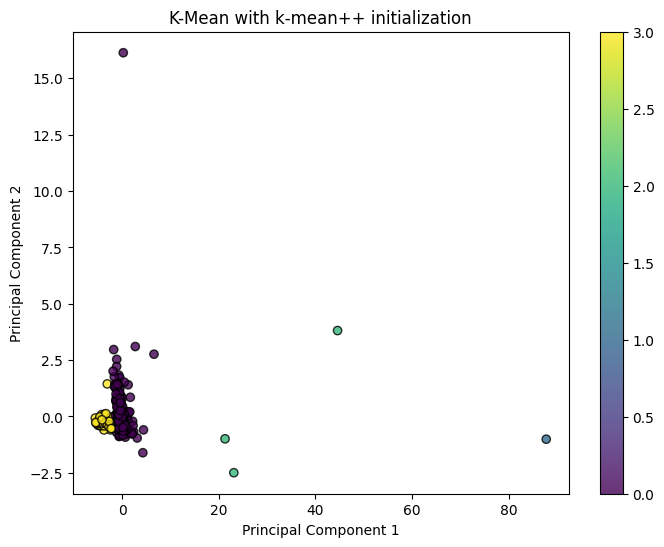

In [114]:
show_cluster(data, kMeanWithPlusPlus.labels_, "K-Mean with k-mean++ initialization")

In [115]:
# c. Bisecting K-Means with random initialization
bisectingKMeanWithRamdom = BisectingKMeans(n_clusters=4, init='random', random_state=42)
bisectingKMeanWithRamdom.fit(data)

BisectingKMeans(n_clusters=4, random_state=42)

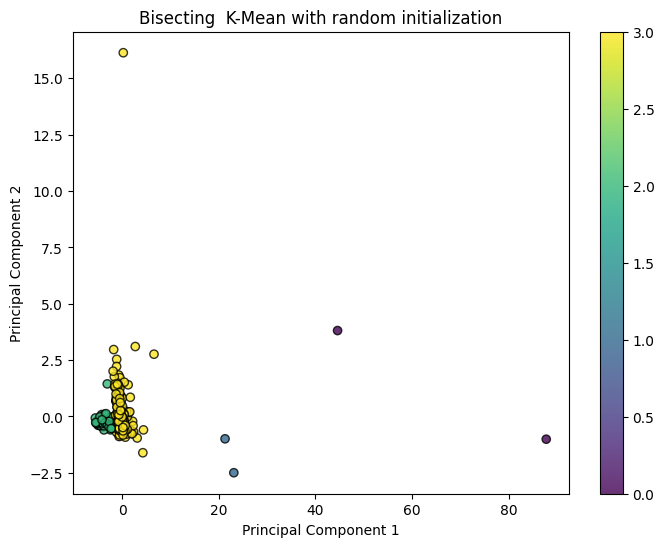

In [116]:
show_cluster(data, bisectingKMeanWithRamdom.labels_, "Bisecting  K-Mean with random initialization")

In [117]:
# d. Spectral Clustering with default parameter
spectralWithDefaultParameter = SpectralClustering(n_clusters=4, random_state=42, affinity='nearest_neighbors')
spectralWithDefaultParameter.fit(data)

SpectralClustering(affinity='nearest_neighbors', n_clusters=4, random_state=42)

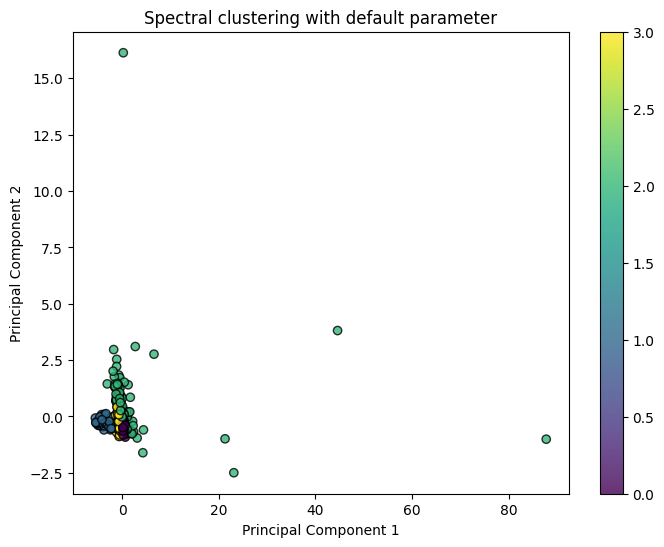

In [118]:
show_cluster(data, spectralWithDefaultParameter.labels_, "Spectral clustering with default parameter")

### DBSCAN

In [119]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscanLabels = dbscan.fit_predict(data)

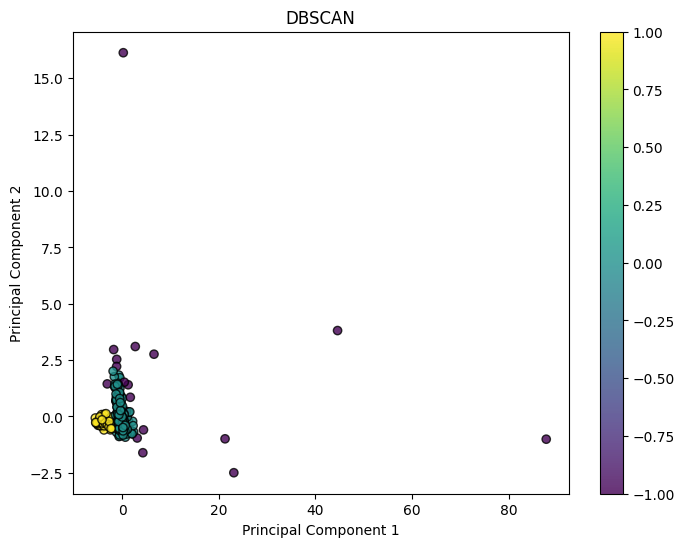

In [120]:
show_cluster(data, dbscanLabels, "DBSCAN")

### Agglomerative Clustering

In [121]:
# (a) Single link (MIN)
singleLink_agg = AgglomerativeClustering(n_clusters=4, linkage='single')
singleLink_agg.fit(data)

AgglomerativeClustering(linkage='single', n_clusters=4)

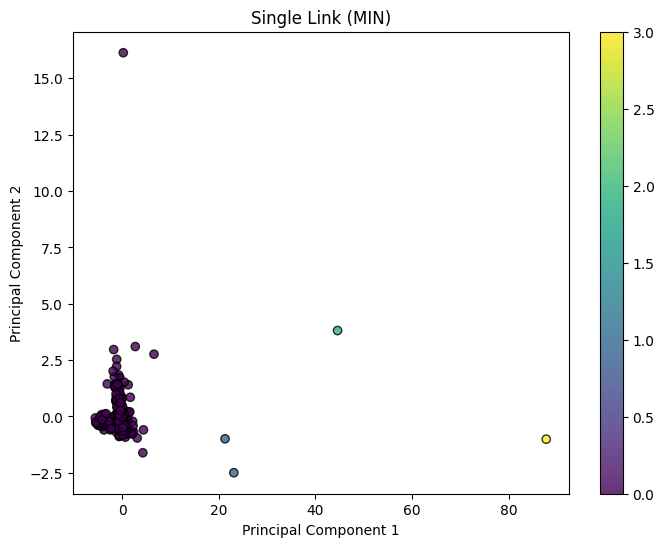

In [122]:
show_cluster(data, singleLink_agg.labels_, "Single Link (MIN)")

In [123]:
# (b) Complete link (MAX)
completeLink_agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
completeLink_agg.fit(data)

AgglomerativeClustering(linkage='complete', n_clusters=4)

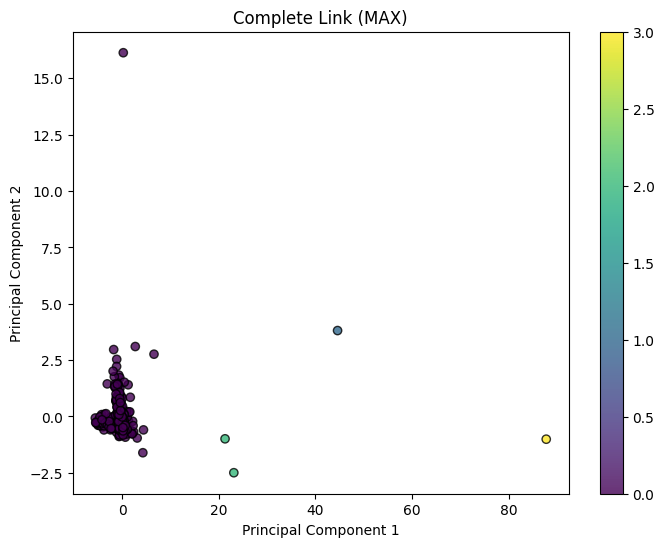

In [124]:
show_cluster(data, completeLink_agg.labels_, "Complete Link (MAX)")

In [125]:
# (c) Group Average
groupAvg_agg = AgglomerativeClustering(n_clusters=4, linkage='average')
groupAvg_agg.fit(data)

AgglomerativeClustering(linkage='average', n_clusters=4)

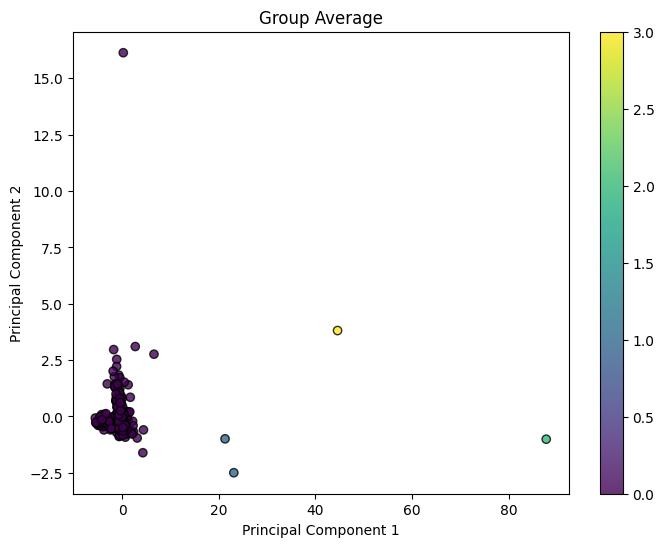

In [126]:
show_cluster(data, groupAvg_agg.labels_, "Group Average")

In [127]:
# (d) Ward’s method
wordMethod_agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
wordMethod_agg.fit(data)

AgglomerativeClustering(n_clusters=4)

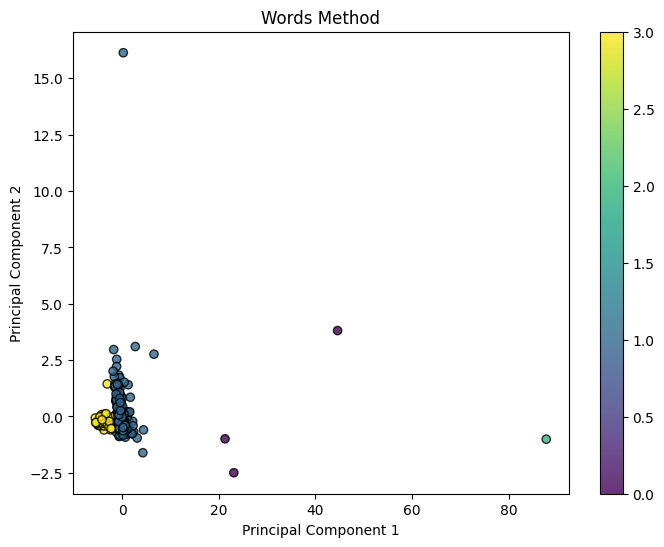

In [128]:
show_cluster(data, wordMethod_agg.labels_,  "Words Method")

4. (Clustering Evaluations) For all the methods in Item 3:
+ (a) Perform clustering performance evaluation using Fowlkes-Mallows index (sklearn.metrics.fowlkes
mallows score). Compute the Fowlkes-Mallows index for each method on the 2D dataset. (0.5
point)
+ (b) Perform clustering performance evaluation using Silhouette Coefficient (sklearn.metrics.silhouette score).
Compute the Silhouette Coefficient for each method. (0.5 point)
+ (c) Rank the methods from the best to the worst for our dataset based on Fowlkes-Mallows index.
(0.5 point)
+ (d) Rank the methods from the best to the worst for our dataset based on Silhouette Coefficient.
(0.5 point)

In [129]:
from sklearn.metrics import fowlkes_mallows_score, silhouette_score

In [135]:
cluster_labels = {
    'K-Mean with random initialization': randomKMean.labels_,
    '"K-Mean with k-mean++ initialization': kMeanWithPlusPlus.labels_,
    'Bisecting  K-Mean with random initialization': bisectingKMeanWithRamdom.labels_,
    'Spectral clustering with default parameter': spectralWithDefaultParameter.labels_,
    'DBSCAN': dbscanLabels,
    'Single Link (MIN)': singleLink_agg.labels_,
    'Complete Link (MAX)': completeLink_agg.labels_,
    'Group Average': groupAvg_agg.labels_,
    'Words Method': wordMethod_agg.labels_
}


# (a) Perform clustering performance evaluation using Fowlkes-Mallows index (sklearn.metrics.fowlkes mallows score). Compute the Fowlkes-Mallows index for each method on the 2D dataset. (0.5 point)
# (b) Perform clustering performance evaluation using Silhouette Coefficient (sklearn.metrics.silhouette score). Compute the Silhouette Coefficient for each method. (0.5 point

def evaluate_clusters(cluster_labels, data, true_labels):
    fowlkesScores = {}
    silhouetteScores = {}

    for name, labels in cluster_labels.items():
        if len(np.unique(labels)) > 1:
            silhouetteScores[name] = silhouette_score(data, labels)
        else:
            silhouetteScores[name] = None  
        
        if true_labels is not None:
            fowlkesScores[name] = fowlkes_mallows_score(true_labels, labels)
        else:
            fowlkesScores[name] = None  

    for name in cluster_labels:
        print(f"{name}:\nFowlkes-Mallows Score: {fowlkesScores.get(name)}, \nSilhouette Score: {silhouetteScores.get(name)}\n")

    return fowlkesScores, silhouetteScores

fowlkesScores, silhouetteScores =  evaluate_clusters(cluster_labels, principal_components, labels) 

K-Mean with random initialization:
Fowlkes-Mallows Score: 0.6295615352480949, 
Silhouette Score: 0.6555522689194412

"K-Mean with k-mean++ initialization:
Fowlkes-Mallows Score: 0.6295546821690253, 
Silhouette Score: 0.6546059403789442

Bisecting  K-Mean with random initialization:
Fowlkes-Mallows Score: 0.6295615352480949, 
Silhouette Score: 0.6555522689194412

Spectral clustering with default parameter:
Fowlkes-Mallows Score: 0.399717941614513, 
Silhouette Score: 0.10822774816208386

DBSCAN:
Fowlkes-Mallows Score: 0.6049756155686895, 
Silhouette Score: 0.6354988409703579

Single Link (MIN):
Fowlkes-Mallows Score: 0.7000840811167937, 
Silhouette Score: 0.9142573730457023

Complete Link (MAX):
Fowlkes-Mallows Score: 0.7000840811167937, 
Silhouette Score: 0.9142573730457023

Group Average:
Fowlkes-Mallows Score: 0.7000840811167937, 
Silhouette Score: 0.9142573730457023

Words Method:
Fowlkes-Mallows Score: 0.6250449506409191, 
Silhouette Score: 0.6395730660174637



In [136]:
def rank_methods(scores, name):
    filteredScores = {k: v for k, v in scores.items() if v is not None}
    sortedMethods = sorted(filteredScores.items(), key=lambda item: item[1], reverse=True)
    
    print(f"Ranking of Clustering Methods Based on {name} Index:")
    for rank, (method, score) in enumerate(sortedMethods, start=1):
        print(f"{rank}. {method}\nScore: {score} \n")


# (c) Rank the methods from the best to the worst for our dataset based on Fowlkes-Mallows index. (0.5 point)
rank_methods(fowlkesScores, "Fowlkes-Mallows")

Ranking of Clustering Methods Based on Fowlkes-Mallows Index:
1. Single Link (MIN)
Score: 0.7000840811167937 

2. Complete Link (MAX)
Score: 0.7000840811167937 

3. Group Average
Score: 0.7000840811167937 

4. K-Mean with random initialization
Score: 0.6295615352480949 

5. Bisecting  K-Mean with random initialization
Score: 0.6295615352480949 

6. "K-Mean with k-mean++ initialization
Score: 0.6295546821690253 

7. Words Method
Score: 0.6250449506409191 

8. DBSCAN
Score: 0.6049756155686895 

9. Spectral clustering with default parameter
Score: 0.399717941614513 



In [137]:
# d. Rank the methods from the best to the worst for our dataset based on Silhouette Coefficient.(0.5 point)
rank_methods(silhouetteScores, "Silhouette Coefficient")

Ranking of Clustering Methods Based on Silhouette Coefficient Index:
1. Single Link (MIN)
Score: 0.9142573730457023 

2. Complete Link (MAX)
Score: 0.9142573730457023 

3. Group Average
Score: 0.9142573730457023 

4. K-Mean with random initialization
Score: 0.6555522689194412 

5. Bisecting  K-Mean with random initialization
Score: 0.6555522689194412 

6. "K-Mean with k-mean++ initialization
Score: 0.6546059403789442 

7. Words Method
Score: 0.6395730660174637 

8. DBSCAN
Score: 0.6354988409703579 

9. Spectral clustering with default parameter
Score: 0.10822774816208386 

